In [1]:
import pandas as pd
import numpy as np
import pickle
import random
from matplotlib import pyplot as plt
from numpy import diff
from MonotonicCheck import monotonicity_score, check_monotonicity


In [2]:
with open('models/XGBoost/XGBoost.pkl', 'rb') as f:
    XGBoost = pickle.load(f)
with open('models/LogisticRegression/LogisticRegression.pkl', 'rb') as f:
    LR = pickle.load(f)
with open('models/RandomForest/RandomForest.pkl', 'rb') as f:
    RF = pickle.load(f)

In [3]:
with open('models/XGBoost/XGBoostTitanic.pkl', 'rb') as f:
    XGBoostTitanic = pickle.load(f)
with open('models/LogisticRegression/LogisticRegressionTitanic.pkl', 'rb') as f:
    LRTitanic = pickle.load(f)
with open('models/RandomForest/RandomForestTitanic.pkl', 'rb') as f:
    RFTitanic = pickle.load(f)
with open('models/KNN/KNNTitanic.pkl', 'rb') as f:
    KNNTitanic = pickle.load(f)

In [4]:
df = pd.read_csv('../datasets/fraud_new.csv')
titanic = pd.read_csv('../datasets/TitanicClean.csv')

In [5]:
df.head(1)

,step,type,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,errorBalanceOrig,errorBalanceDest
0,1,0,181.0,181.0,0.0,0.0,0.0,1,0.0,181.0


In [6]:
example = df.sample(1)
example
frauds = df[df.isFraud == 1]
exampleFraud = frauds.sample(1)
example = example.drop('isFraud', axis = 1)
exampleFraud = exampleFraud.drop('isFraud', axis = 1)

In [7]:
cycles = 2 # how many sine cycles
resolution = 150 # how many datapoints to generate

length = np.pi * 2 * cycles
my_wave = np.sin(np.arange(0, length, length / resolution))

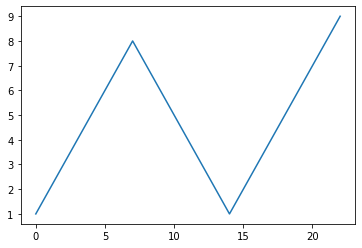

0.36363636363636365


In [26]:
import math
v = [1,2,3,4,5,6,7,8,7,6,5,4,3,2,1,2,3,4,5,6,7,8,9] 
plt.plot([x for x in range(len(v))], v)
plt.show()
print(monotonicity_score(v))


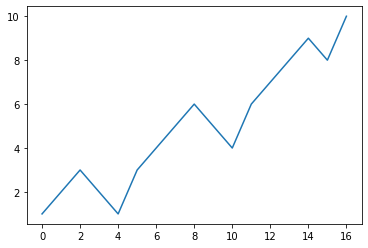

0.375


In [27]:
v= [1,2,3,2,1,3,4,5,6,5,4,6,7,8,9,8,10]
plt.plot([x for x in range(len(v))], v)
plt.show()
print(monotonicity_score(v))


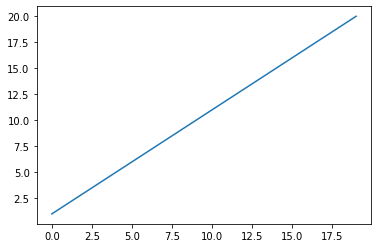

1.0


In [10]:
v = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.plot([x for x in range(len(v))], v)
plt.show()
print(monotonicity_score(v))


In [11]:
models = [XGBoost, LR, RF]
modelsTitanic = [XGBoostTitanic,LRTitanic, RFTitanic, KNNTitanic]

Model: XGBClassifier
Feature 'step' has a score of 0.5


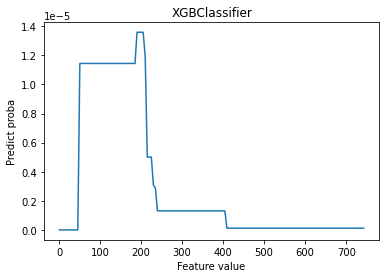

Model: LogisticRegression
Feature step has monotonic behavior between ranges 1 and 743


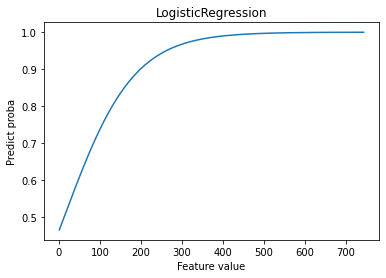

Model: RandomForestClassifier
Feature step has monotonic behavior between ranges 1 and 743


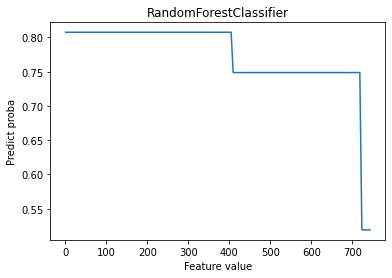

Model: XGBClassifier
Feature type has monotonic behavior between ranges 0 and 1


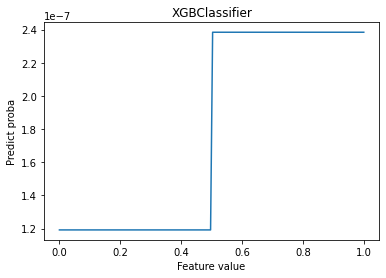

Model: LogisticRegression
Feature type has monotonic behavior between ranges 0 and 1


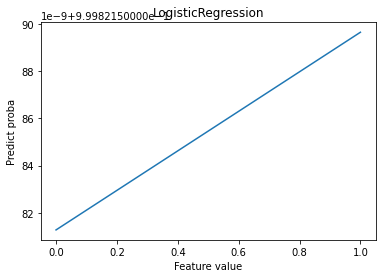

Model: RandomForestClassifier
Feature type has monotonic behavior between ranges 0 and 1


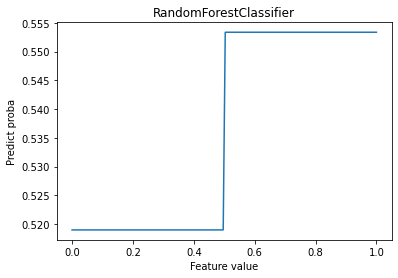

Model: XGBClassifier
Feature amount has monotonic behavior between ranges 0.0 and 92445516.64


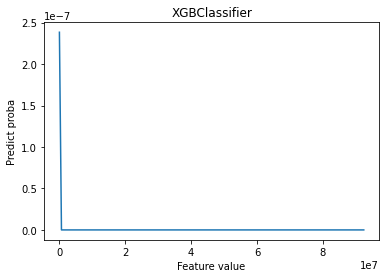

Model: LogisticRegression
Feature amount has monotonic behavior between ranges 0.0 and 92445516.64


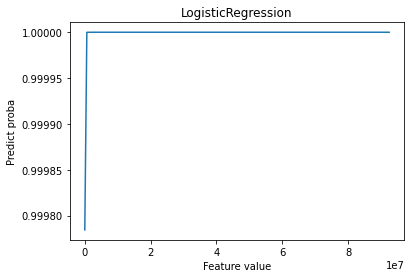

Model: RandomForestClassifier
Feature 'amount' has a score of 0.5


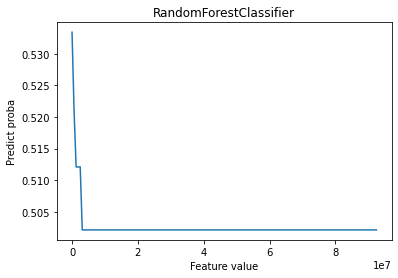

Model: XGBClassifier
Feature oldBalanceOrig has monotonic behavior between ranges 0.0 and 59585040.37


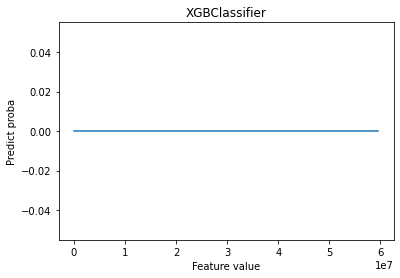

Model: LogisticRegression
Feature oldBalanceOrig has monotonic behavior between ranges 0.0 and 59585040.37


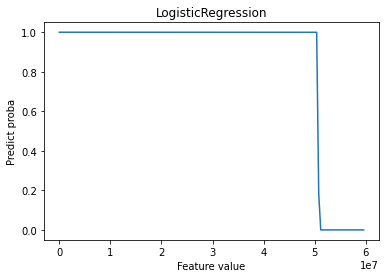

Model: RandomForestClassifier
Feature oldBalanceOrig has monotonic behavior between ranges 0.0 and 59585040.37


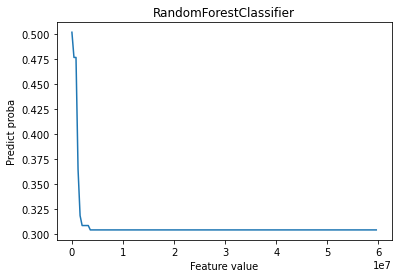

Model: XGBClassifier
Feature newBalanceOrig has monotonic behavior between ranges 0.0 and 49585040.37


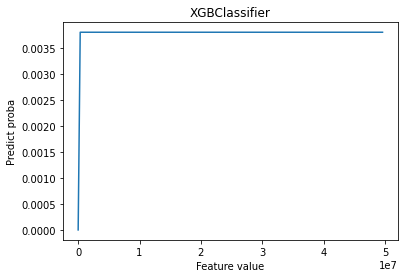

Model: LogisticRegression
Feature newBalanceOrig has monotonic behavior between ranges 0.0 and 49585040.37


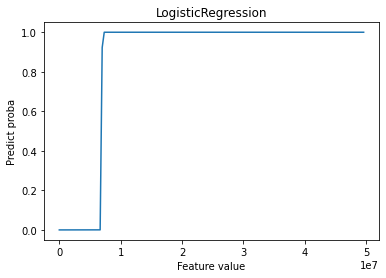

Model: RandomForestClassifier
Feature 'newBalanceOrig' has a score of 0.0


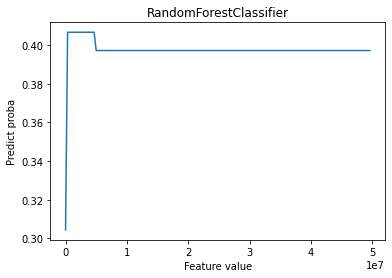

Model: XGBClassifier
Feature oldBalanceDest has monotonic behavior between ranges 0.0 and 356015889.35


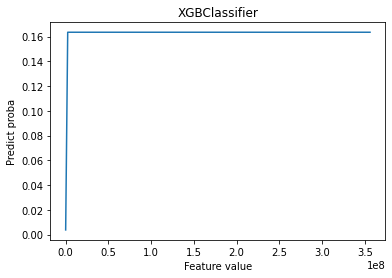

Model: LogisticRegression
Feature oldBalanceDest has monotonic behavior between ranges 0.0 and 356015889.35


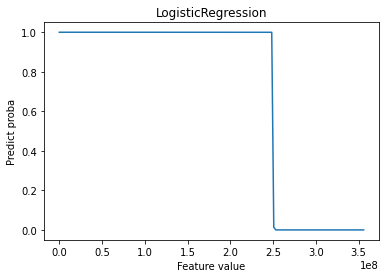

Model: RandomForestClassifier
Feature oldBalanceDest has monotonic behavior between ranges 0.0 and 356015889.35


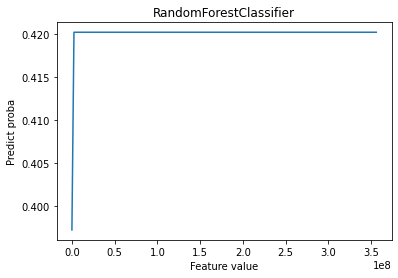

Model: XGBClassifier
Feature 'newBalanceDest' has a score of 0.3333333333333333


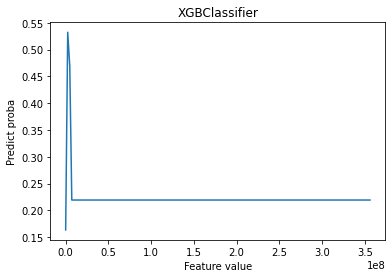

Model: LogisticRegression
Feature newBalanceDest has monotonic behavior between ranges 0.0 and 356179278.92


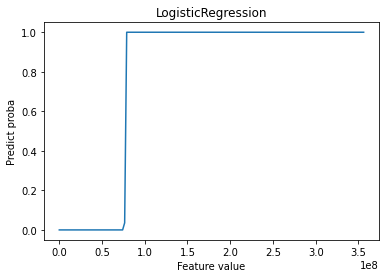

Model: RandomForestClassifier
Feature newBalanceDest has monotonic behavior between ranges 0.0 and 356179278.92


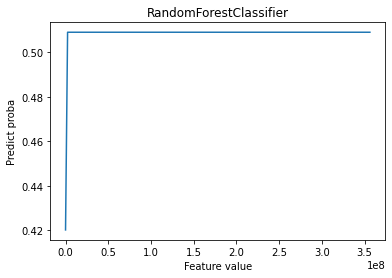

Model: XGBClassifier
Feature 'errorBalanceOrig' has a score of 0.3333333333333333


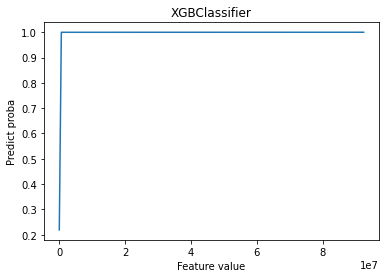

Model: LogisticRegression
Feature errorBalanceOrig has monotonic behavior between ranges -0.0100000016391277 and 92445516.64


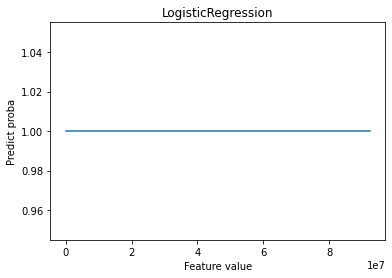

Model: RandomForestClassifier
Feature 'errorBalanceOrig' has a score of 0.0


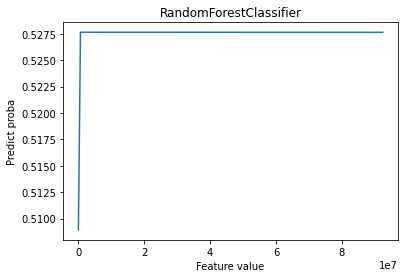

Model: XGBClassifier
Feature errorBalanceDest has monotonic behavior between ranges -75885725.63000001 and 10000000.0


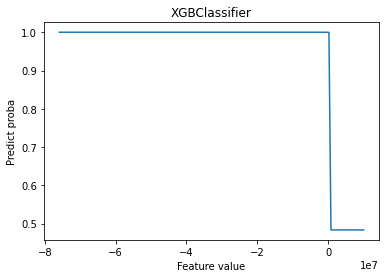

Model: LogisticRegression
Feature errorBalanceDest has monotonic behavior between ranges -75885725.63000001 and 10000000.0


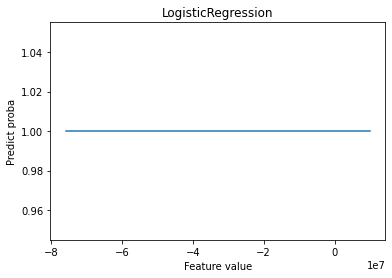

Model: RandomForestClassifier
Feature errorBalanceDest has monotonic behavior between ranges -75885725.63000001 and 10000000.0


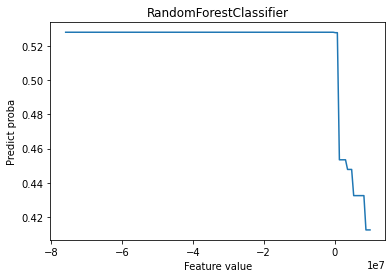

In [12]:
for c in df.columns:
    if c != 'isFraud':
        minV = df[c].min()
        maxV = df[c].max()
        for model in models:
            check_monotonicity(c,minV,maxV,exampleFraud, model, 150, plot_graph=True)


In [14]:
exampleTitanic = titanic.sample(1)

PassengerId 1 891
Model: XGBClassifier
Feature PassengerId has monotonic behavior between ranges 1 and 891


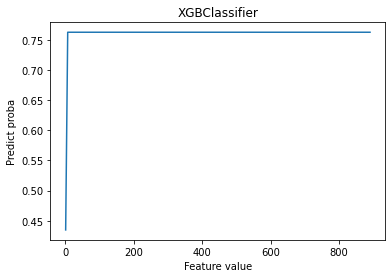

Model: LogisticRegression
Feature PassengerId has monotonic behavior between ranges 1 and 891


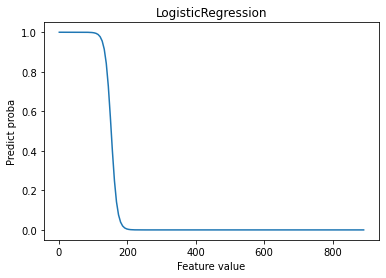

Model: RandomForestClassifier
Feature PassengerId has monotonic behavior between ranges 1 and 891


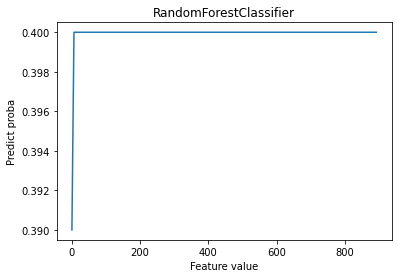

Model: KNeighborsClassifier
Feature 'PassengerId' has a score of 0.0


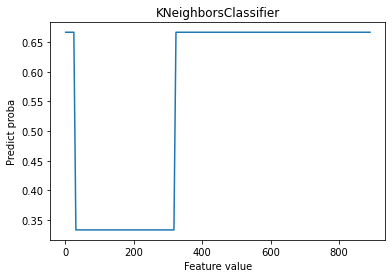

Pclass 1 3
Model: XGBClassifier
Feature Pclass has monotonic behavior between ranges 1 and 3


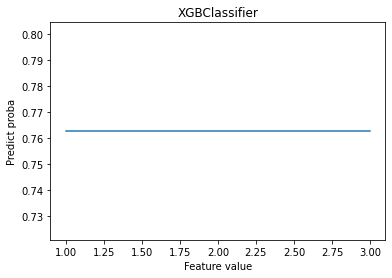

Model: LogisticRegression
Feature Pclass has monotonic behavior between ranges 1 and 3


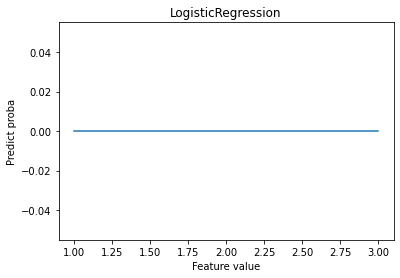

Model: RandomForestClassifier
Feature Pclass has monotonic behavior between ranges 1 and 3


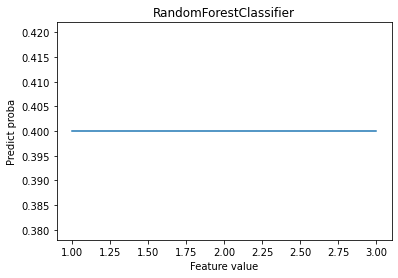

Model: KNeighborsClassifier
Feature Pclass has monotonic behavior between ranges 1 and 3


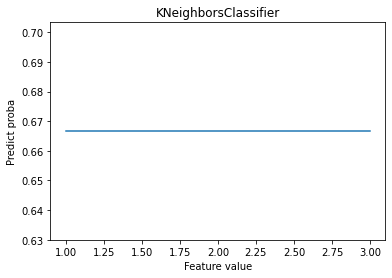

Age 0.42 80.0
Model: XGBClassifier
Feature 'Age' has a score of 0.2


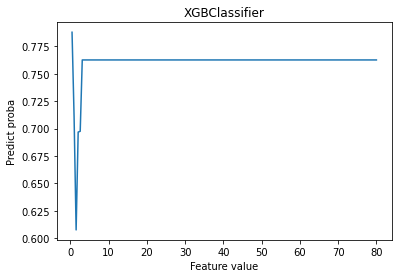

Model: LogisticRegression
Feature Age has monotonic behavior between ranges 0.42 and 80.0


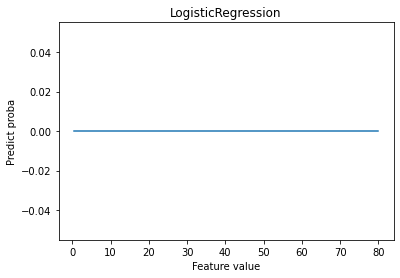

Model: RandomForestClassifier
Feature 'Age' has a score of 0.6


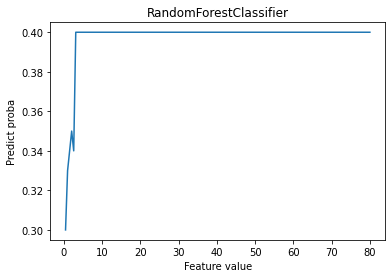

Model: KNeighborsClassifier
Feature Age has monotonic behavior between ranges 0.42 and 80.0


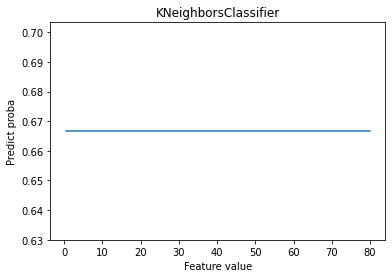

SibSp 0 8
Model: XGBClassifier
Feature 'SibSp' has a score of 0.3333333333333333


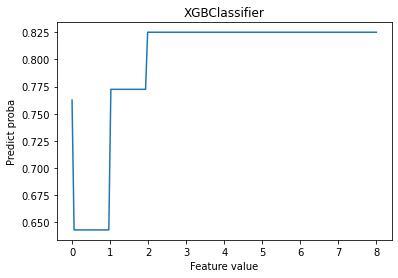

Model: LogisticRegression
Feature SibSp has monotonic behavior between ranges 0 and 8


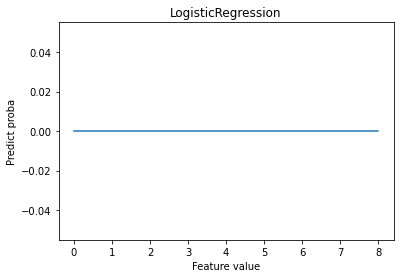

Model: RandomForestClassifier
Feature SibSp has monotonic behavior between ranges 0 and 8


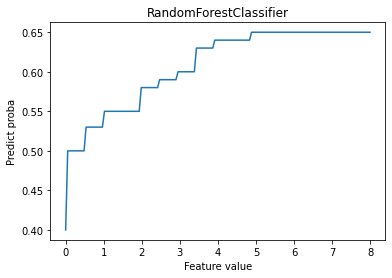

Model: KNeighborsClassifier
Feature SibSp has monotonic behavior between ranges 0 and 8


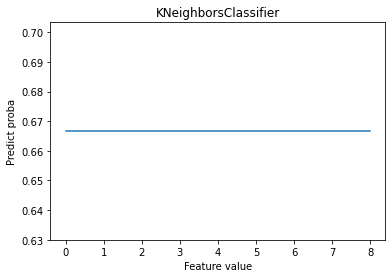

Parch 0 6
Model: XGBClassifier
Feature Parch has monotonic behavior between ranges 0 and 6


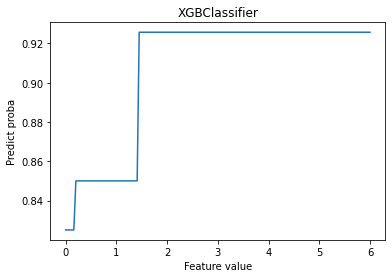

Model: LogisticRegression
Feature Parch has monotonic behavior between ranges 0 and 6


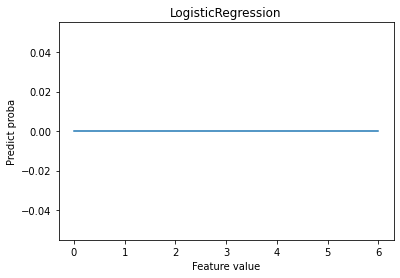

Model: RandomForestClassifier
Feature Parch has monotonic behavior between ranges 0 and 6


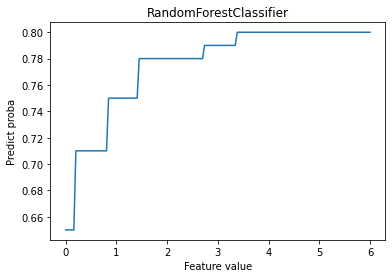

Model: KNeighborsClassifier
Feature Parch has monotonic behavior between ranges 0 and 6


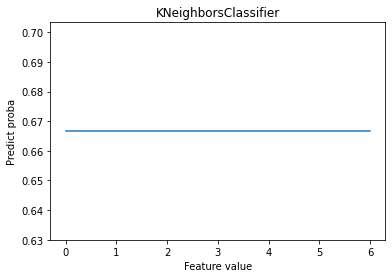

Fare 0.0 512.3292
Model: XGBClassifier
Feature Fare has monotonic behavior between ranges 0.0 and 512.3292


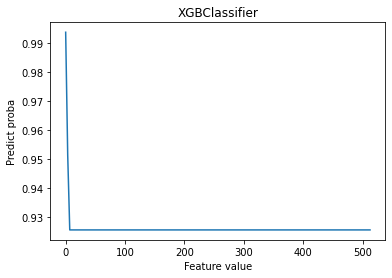

Model: LogisticRegression
Feature Fare has monotonic behavior between ranges 0.0 and 512.3292


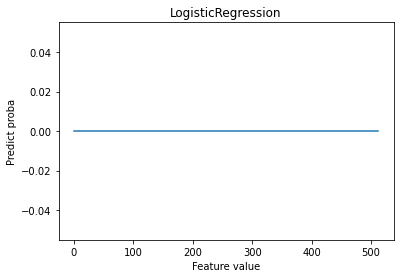

Model: RandomForestClassifier
Feature 'Fare' has a score of 0.0


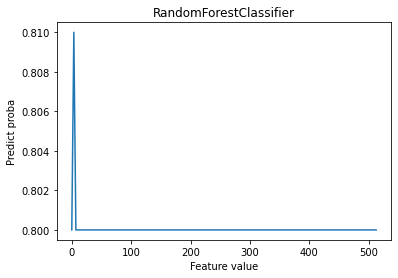

Model: KNeighborsClassifier
Feature Fare has monotonic behavior between ranges 0.0 and 512.3292


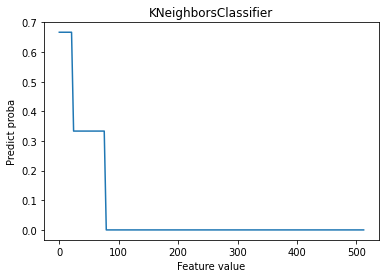

Sex_male 0 1
Model: XGBClassifier
Feature Sex_male has monotonic behavior between ranges 0 and 1


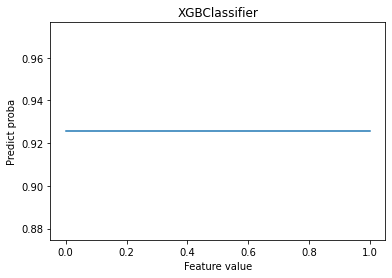

Model: LogisticRegression
Feature Sex_male has monotonic behavior between ranges 0 and 1


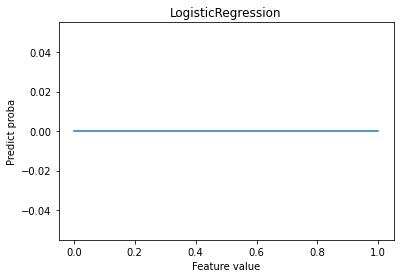

Model: RandomForestClassifier
Feature Sex_male has monotonic behavior between ranges 0 and 1


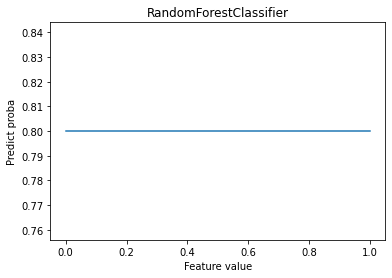

Model: KNeighborsClassifier
Feature Sex_male has monotonic behavior between ranges 0 and 1


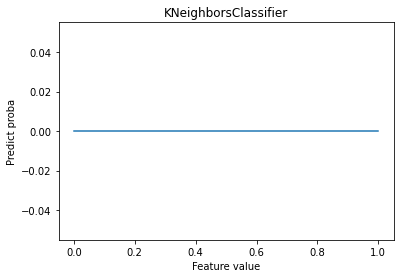

Embarked_Q 0 1
Model: XGBClassifier
Feature Embarked_Q has monotonic behavior between ranges 0 and 1


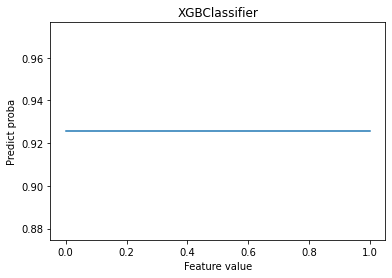

Model: LogisticRegression
Feature Embarked_Q has monotonic behavior between ranges 0 and 1


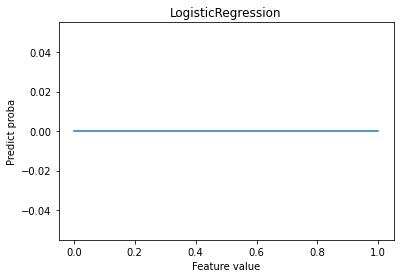

Model: RandomForestClassifier
Feature Embarked_Q has monotonic behavior between ranges 0 and 1


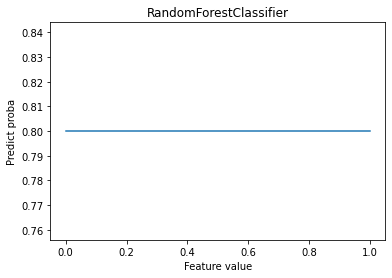

Model: KNeighborsClassifier
Feature Embarked_Q has monotonic behavior between ranges 0 and 1


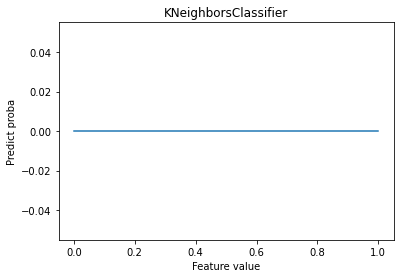

Embarked_S 0 1
Model: XGBClassifier
Feature Embarked_S has monotonic behavior between ranges 0 and 1


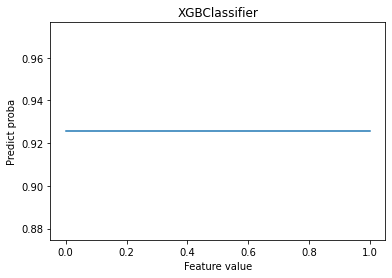

Model: LogisticRegression
Feature Embarked_S has monotonic behavior between ranges 0 and 1


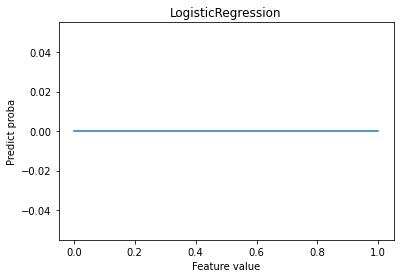

Model: RandomForestClassifier
Feature Embarked_S has monotonic behavior between ranges 0 and 1


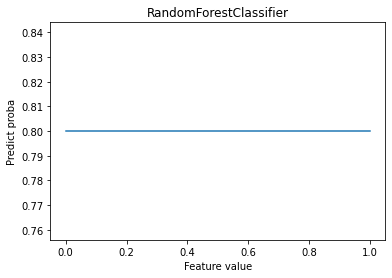

Model: KNeighborsClassifier
Feature Embarked_S has monotonic behavior between ranges 0 and 1


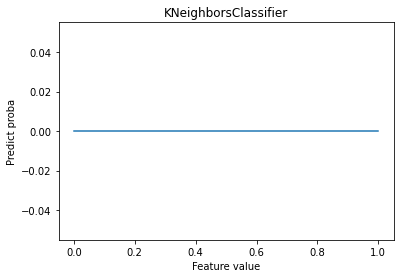

In [16]:
for c in titanic.columns:
    if titanic[c].dtypes != object:
        minV = titanic[c].min()
        maxV = titanic[c].max()
        print(c, minV, maxV)
        for model in modelsTitanic:
            check_monotonicity(c,minV,maxV,exampleTitanic, model, 150, plot_graph=True)